In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
filename = '/home/missgouthami/JPTR_NTBK/DATA/Iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


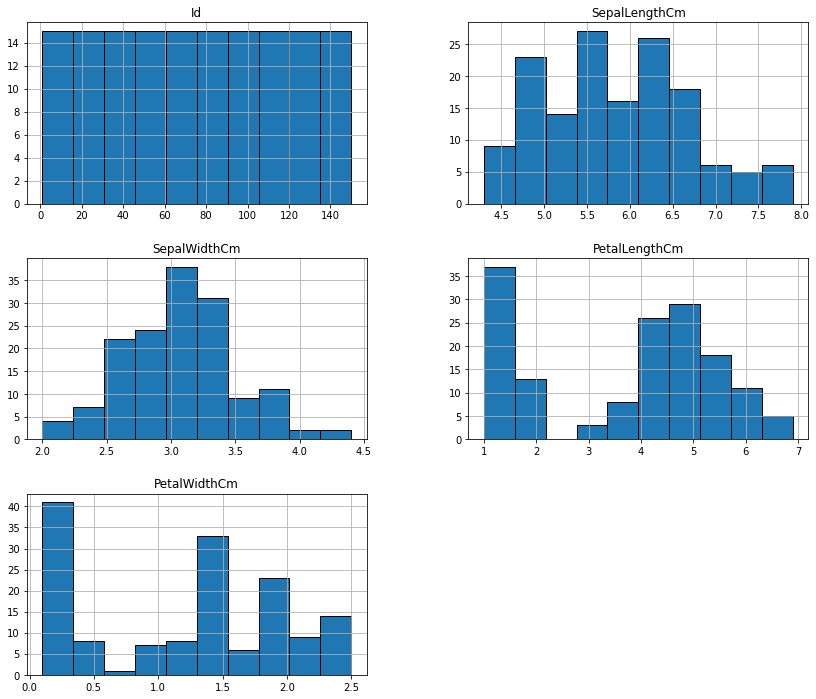

In [6]:
# Plotting histogram for each variable. 

df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

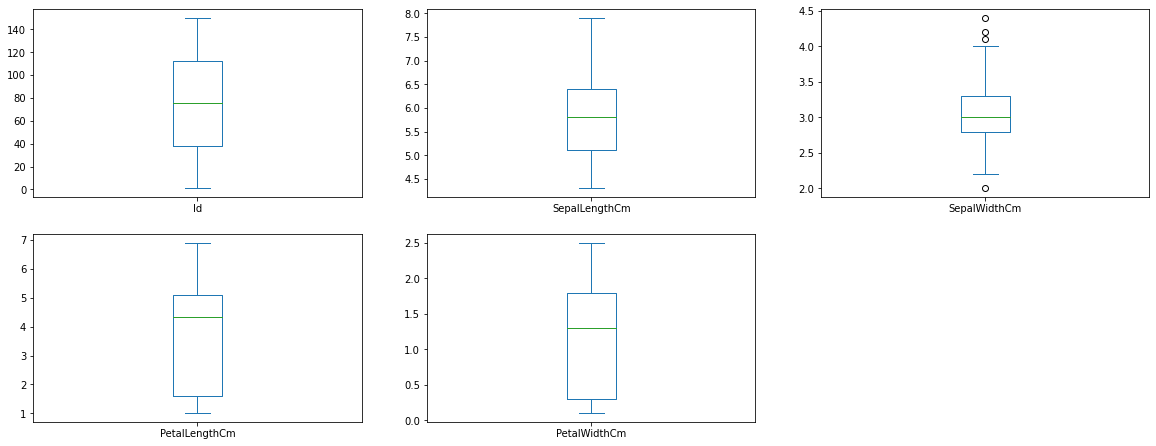

In [7]:
# Boxplots
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,20))
plt.show()

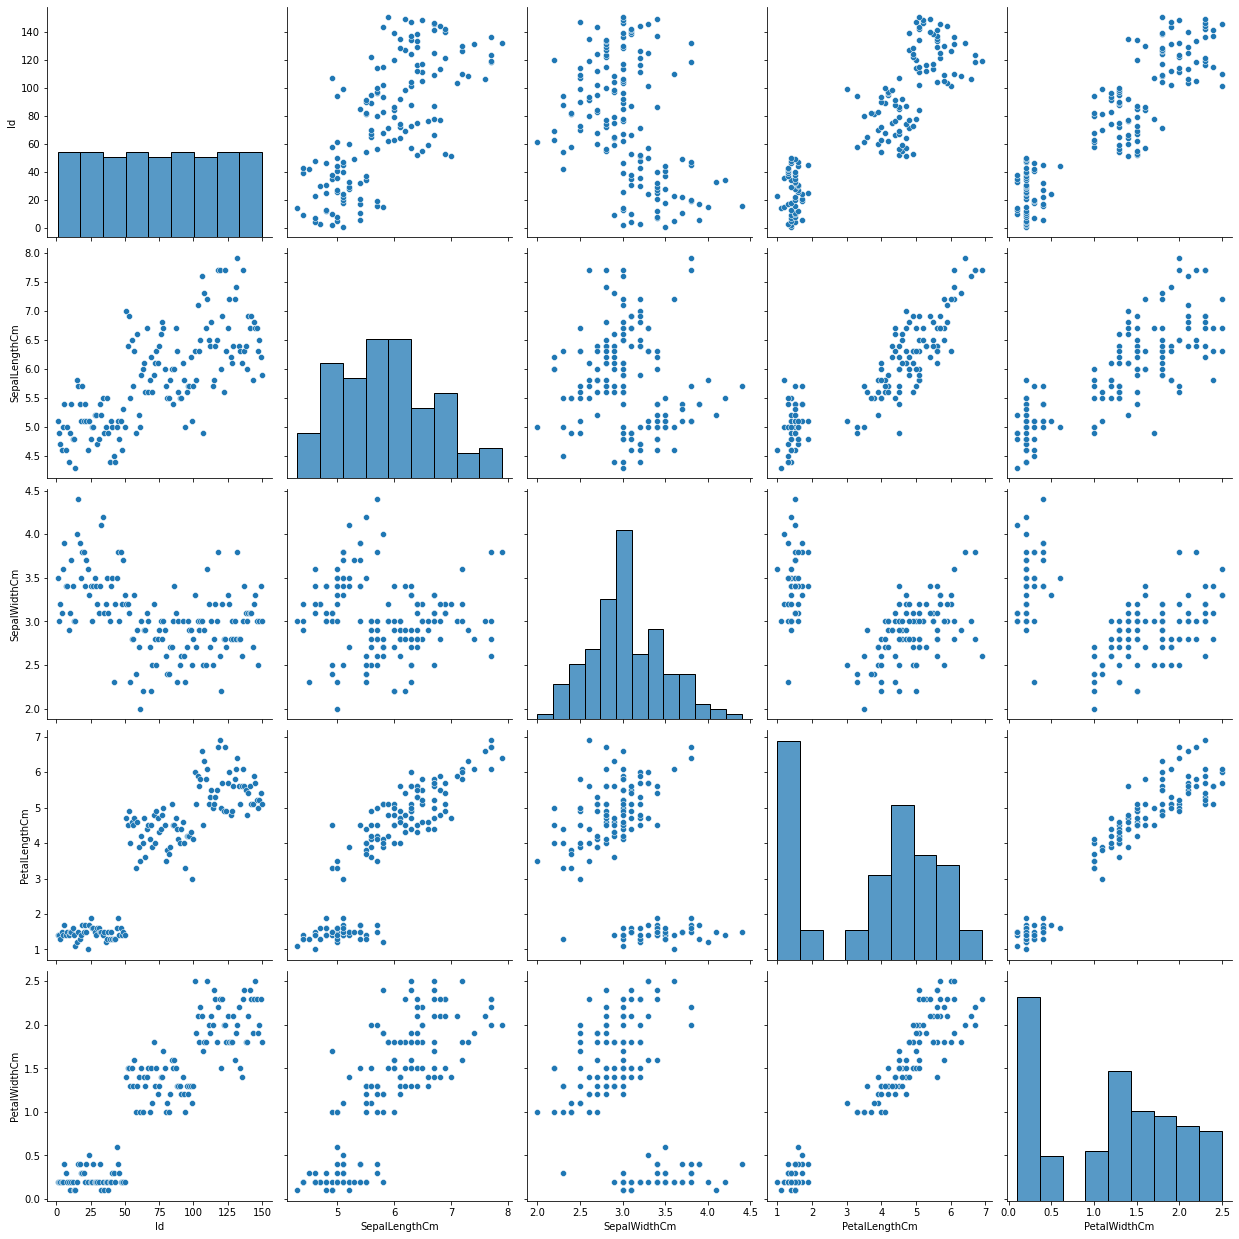

In [8]:
#create Pairplots
sns.pairplot(df, height=3.5);
plt.show()

In [9]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

In [12]:
labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_encoder=LabelEncoder()
label_ids=label_encoder.fit_transform(labels)
 
print(labels)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [13]:
print(label_ids)

[0 1 2]


In [14]:
onehot_encoder=OneHotEncoder(sparse=False)
reshaped=label_ids.reshape(len(label_ids), 1)
onehot=onehot_encoder.fit_transform(reshaped)

print(onehot)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [15]:
array = df.values
X = array[:,1:5]
Y = array[:,5]

In [16]:
from sklearn.model_selection import train_test_split
test_size = 0.33

seed = 7

X_train, X_test, train_y, test_y = train_test_split(X, Y, test_size=test_size,random_state=seed)

In [17]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))


Y_train = one_hot_encode_object_array(train_y)
Y_test = one_hot_encode_object_array(test_y)

In [41]:
def create_model():
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer=keras.optimizers.Adam(lr=0.01))
    return model

In [19]:
#model.compile(loss='categorical_crossentropy',
                  #metrics=['accuracy'],
                  #optimizer=keras.optimizers.Adam(lr=0.01))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, Y_train,
                        batch_size=16,
                        epochs=200,
                        verbose=1,
                        validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss ' ,score[0])
print('Test accuracy ' ,score[1])


Train on 100 samples, validate on 50 samples
Epoch 1/200
100/100 [==============================] - 0s 264us/step - loss: 0.0544 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 2/200
100/100 [==============================] - 0s 248us/step - loss: 0.0593 - accuracy: 0.9700 - val_loss: 0.0663 - val_accuracy: 0.9800
Epoch 3/200
100/100 [==============================] - 0s 242us/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0766 - val_accuracy: 0.9800
Epoch 4/200
100/100 [==============================] - 0s 250us/step - loss: 0.0576 - accuracy: 0.9800 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 5/200
100/100 [==============================] - 0s 250us/step - loss: 0.0604 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 6/200
100/100 [==============================] - 0s 250us/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.0818 - val_accuracy: 0.9800
Epoch 7/200
100/100 [==============================] - 0s 238us/step - loss: 0.0546 -

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [53]:
model = create_model()

In [54]:
evaluator = KerasClassifier(build_fn=create_model, epochs = 200, batch_size=5)

In [56]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
results = cross_val_score(evaluator, X_test, Y_test, cv=kfold)

print("Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
45/45 [==============================] - 1s 16ms/step - loss: 2.1535 - accuracy: 0.3333
Epoch 2/200
45/45 [==============================] - 0s 494us/step - loss: 1.4086 - accuracy: 0.3333
Epoch 3/200
45/45 [==============================] - 0s 502us/step - loss: 1.1220 - accuracy: 0.3333
Epoch 4/200
45/45 [==============================] - 0s 473us/step - loss: 1.0124 - accuracy: 0.3333
Epoch 5/200
45/45 [==============================] - 0s 475us/step - loss: 0.9372 - accuracy: 0.5333
Epoch 6/200
45/45 [==============================] - 0s 480us/step - loss: 0.8552 - accuracy: 0.5778
Epoch 7/200
45/45 [==============================] - 0s 480us/step - loss: 0.7824 - accuracy: 0.6444
Epoch 8/200
45/45 [==============================] - 0s 476us/step - loss: 0.7176 - accuracy: 0.6222
Epoch 9/200
45/45 [==============================] - 0s 478us/step - loss: 0.6685 - accuracy: 0.6889
Epoch 10/200
45/45 [==============================] - 0s 470us/step - loss: 0.6279 - accurac